# Problem statement
To perfom K-Means clustering on customer dataset to segregate them based on the data in form of optimal clusters

# Loading dependencies

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import (LabelEncoder, StandardScaler)
from sklearn.model_selection import (train_test_split, cross_val_score)
from sklearn.cluster import KMeans


# Loading the dataset & Exploration

In [4]:
customers = pd.read_csv("/content/drive/MyDrive/Datasets/Mall_Customers.csv")
customers.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
customers.shape

(200, 5)

In [7]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
customers.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# Cleaning

In [12]:
missing_values = customers.isnull().sum()
print(missing_values)

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [17]:
customers.duplicated().sum()

0

In [22]:
X = customers.iloc[:, [3, 4]].values

In [23]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

# Finding the K value using the Elbow method
* using K-Means to iterate from 1 to 11 clusters and plotting a Elbow plot
*   Deciding optimal number of clusters to be used





In [41]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

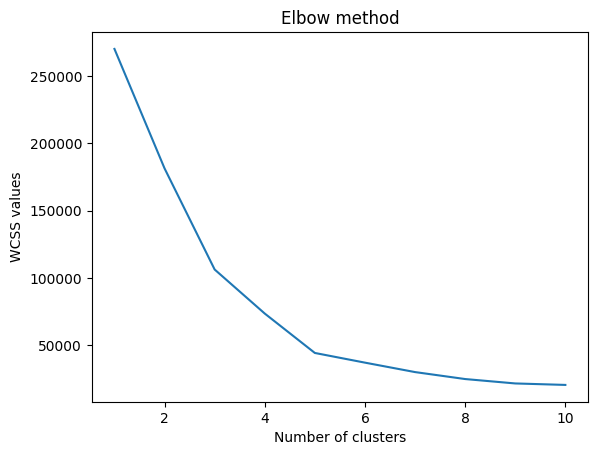

In [32]:
plt.plot(range(1, 11), wcss)
plt.title("Elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS values")

plt.show()

# Model Training
* Using K-Means model, initialize the model with selected number of clusters

* Plot the clusters and gain intuition regarding our customer segmentation




In [36]:
# initializing the model
model = KMeans(n_clusters=5, init='k-means++', random_state=0, n_init=10)

In [37]:
# predictions
y_model = model.fit_predict(X)

# Visualizing the clusters formed

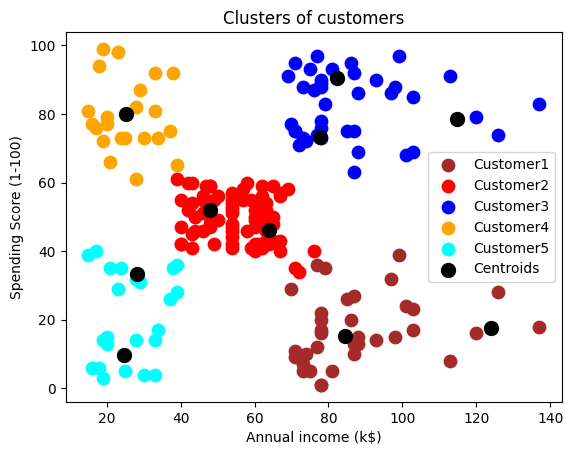

In [45]:
# plotting the clusters
plt.scatter(X[y_model == 0, 0], X[y_model == 0, 1], s = 80, c = "brown", label='Customer1')
plt.scatter(X[y_model == 1, 0], X[y_model == 1, 1], s = 80, c = "red", label='Customer2')
plt.scatter(X[y_model == 2, 0], X[y_model == 2, 1], s = 80, c = "blue", label='Customer3')
plt.scatter(X[y_model == 3, 0], X[y_model == 3, 1], s = 80, c = "orange", label='Customer4')
plt.scatter(X[y_model == 4, 0], X[y_model == 4, 1], s = 80, c = "cyan", label='Customer5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c="black", label='Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()

plt.show()


# Conclusion

1.   Orange cluster represents the customers having less salary but are spending more
2.   Brown cluster  represents customers whose annual salary is high but there spending is comparatively less
3. Red cluster customers are the target audience since the maximum people are included in that cluster. They have a decent salary and their spending is also good


